# k-nearest neighbors
Copyright 2020 Denis Rothman MIT License. See LICENSE.

## Program modules

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#@title Importing data <br> repository is set to "github"(default) to read the data from GitHub <br> set repository to "google" to read the data from Google Drive {display-mode: "form"}
import os
from google.colab import drive

#Set repository to "github" to read the data from GitHub 
#Set repository to "google" to read the data from Google
repository="github" 

if repository=="github":
  !curl -L https://raw.githubusercontent.com/PacktPublishing/Hands-On-Explainable-AI-XAI-with-Python/master/Chapter01/D1.csv --output "D1.csv"
 
  #Setting the path for each file
  df2="/content/D1.csv"
  print(df2)

if repository=="google":
  #Mounting the drive. If it is not mounted, a prompt will provide instructions.
  drive.mount('/content/drive')
  #Setting the path for each file
  df2='/content/drive/My Drive/XAI/Chapter01/D1.csv'
  print(df2)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3229  100  3229    0     0   7972      0 --:--:-- --:--:-- --:--:--  7992
/content/D1.csv


## Opening and reading the file

In [ ]:
df = pd.read_csv(df2)
print (df)

     colored_sputum  cough  fever  headache class
0               1.0    3.5    9.4       3.0   flu
1               1.0    3.4    8.4       4.0   flu
2               1.0    3.3    7.3       3.0   flu
3               1.0    3.4    9.5       4.0   flu
4               1.0    2.0    8.0       3.5   flu
..              ...    ...    ...       ...   ...
145             0.0    1.0    4.2       2.3  cold
146             0.5    2.5    2.0       1.7  cold
147             0.0    1.0    3.2       2.0  cold
148             0.4    3.4    2.4       2.3  cold
149             0.0    1.0    3.1       1.8  cold

[150 rows x 5 columns]


## Training the model

In [ ]:
# KNN classification labels
X = df.loc[:,'colored_sputum':'headache']
Y = df.loc[:,'class']

# Trains the model
knn = KNeighborsClassifier()
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Display the trained model's output

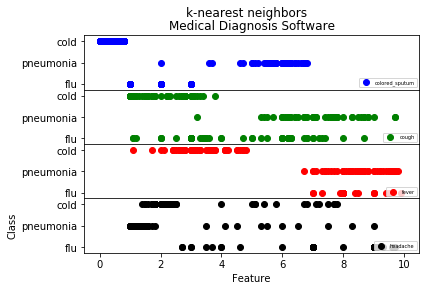

In [ ]:
df = pd.read_csv(df2) 
# Plotting the relation of each feature with each class
figure,(sub1,sub2,sub3,sub4)=plt.subplots(4,sharex=True,sharey=True)
plt.suptitle('k-nearest neighbors')
plt.xlabel('Feature')
plt.ylabel('Class') 
X = df.loc[:,'colored_sputum']
Y = df.loc[:,'class']
sub1.scatter(X, Y,color='blue',label='colored_sputum')
sub1.legend(loc=4, prop={'size': 5})
sub1.set_title('Medical Diagnosis Software')
X = df.loc[:,'cough']
Y = df.loc[:,'class']
sub2.scatter(X, Y,color='green',label='cough')
sub2.legend(loc=4, prop={'size': 5})
X = df.loc[:,'fever']
Y = df.loc[:,'class']
sub3.scatter(X, Y,color='red',label='fever')
sub3.legend(loc=4, prop={'size': 5})
X = df.loc[:,'headache']
Y = df.loc[:,'class']
sub4.scatter(X, Y,color='black',label='headache')
sub4.legend(loc=4, prop={'size': 5})
figure.subplots_adjust(hspace=0)
plt.show()

## Evaluating the symptoms on a scale of 1 to 9

In [ ]:
#@title Evaluation form
colored_sputum =  1#@param {type:"integer"}
cough=3#@param {type:"integer"}
fever=7#@param {type:"integer"}
headache=5#@param {type:"integer"}

## The prediction based on the symptoms

In [ ]:
# colored_sputum,cough,fever,headache
cs=colored_sputum;c=cough;f=fever;h=headache;
X_DL = [[cs,c,f,h]] 
prediction = knn.predict(X_DL)
print ("The prediction is:",str(prediction).strip('[]'))

The prediction is: 'flu'
